In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('FollowUpQualitativeSurveyResponse.csv')

In [3]:
response=df['Q37'].tolist()

In [4]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\colin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df['scores']=df['Q37'].apply(lambda Q37: sentiment.polarity_scores(Q37))

In [6]:
df['compound']=df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Q37,scores,compound
0,We are interested in how your experiences in F...,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp...",0.7184
1,I had to work harder on making social connecti...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,I usually teach face-to-face SCALE-UP. So one...,"{'neg': 0.028, 'neu': 0.972, 'pos': 0.0, 'comp...",-0.4215
3,Our institution pivoted to 100% online in one ...,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",0.7346
4,"I could plan ahead for online teaching, so I c...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [7]:
compound_scores=df['compound'].tolist()
print(compound_scores)

[0.7184, 0.0, -0.4215, 0.7346, 0.0, -0.0258, 0.8904, 0.6249, 0.8362, 0.6249, 0.8074, 0.8313, -0.9023, 0.3818, 0.9259, 0.0, 0.9999, 0.0, -0.34, -0.863, -0.8937, 0.3818, 0.6549, 0.0, 0.0, -0.4574, 0.3291, 0.5256, 0.4019, 0.4118, -0.5423, 0.2023, 0.4215, 0.8986, 0.5632, -0.4965, -0.5451, 0.7909, 0.4498, 0.7373, -0.1779, 0.5859, -0.6124, 0.4053, 0.1774, 0.9136, -0.2484, 0.4215, 0.0, -0.0516, 0.8384, 0.9632, 0.9791, 0.2023, 0.0, 0.0, -0.5244, 0.2023, 0.4588, 0.7269, 0.2484, -0.0516, -0.2057, 0.8436, -0.8369, 0.4926, -0.9385, 0.8442, 0.765, 0.9423, 0.2732, 0.0, 0.0, 0.6249, 0.9651, -0.7003, 0.4033, 0.7575, 0.183, 0.796, 0.8225, -0.4201, -0.296, -0.0258, -0.128, -0.34, -0.3384, -0.128, 0.0, -0.5859, -0.0334, -0.4588, -0.0258, 0.4391, 0.1531, 0.0, -0.9604, 0.9759, -0.2878, 0.0514, 0.8765, 0.6369, 0.2732, 0.9315, 0.4902, -0.0704, -0.4215, 0.0, 0.4497, -0.0516, 0.9845, 0.4588, -0.1045, 0.915, -0.0772, 0.4215, 0.4927, 0.6054, 0.9194, -0.5567, -0.3384, 0.8894, 0.0, 0.7096, 0.8852, 0.296, -0.3086, 

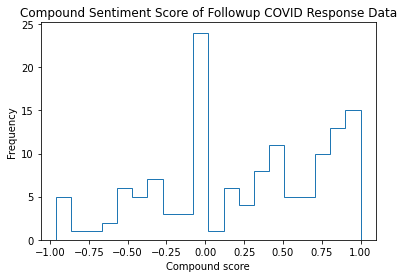

In [13]:
plt.hist(compound_scores, bins=20, histtype='step')
plt.xlabel('Compound score')
plt.ylabel('Frequency')
plt.title('Compound Sentiment Score of Followup COVID Response Data')
plt.savefig('followuphist.png')
plt.show()

In [9]:
compound_sc=np.array(compound_scores)
print(len(compound_scores))

135


In [10]:
mu=np.mean(compound_sc)
std=np.std(compound_sc)
minimum=np.min(compound_sc)
maximum=np.max(compound_sc)
median=np.median(compound_sc)
print(mu,std,minimum,maximum,median)

0.2440059259259259 0.5313009612002324 -0.9604 0.9999 0.296


In [11]:
import scipy.stats as st
st.t.interval(alpha=0.95, df=len(compound_scores)-1, loc=np.mean(compound_scores), scale=st.sem(compound_scores))

(0.15322884128197167, 0.33478301056988014)